# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [18]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

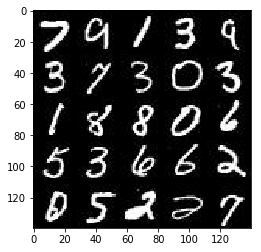

In [19]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

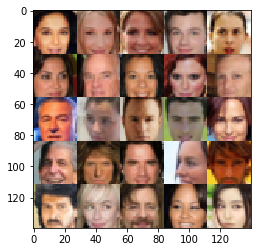

In [20]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [22]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(dtype=tf.float32, shape=None, name="learning_rate")
    return (input_real, inputs_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [23]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    '''
    The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 
    dimensional images. The CelebA images will be cropped to remove parts of the image that 
    don't include a face, then resized down to 28x28.
    '''
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope("discriminator", reuse=reuse):
        # image size 28*28*3
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
        return (output, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [24]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    training= True
    alpha = 0.01
    with tf.variable_scope("generator", reuse= not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=training)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28 x 28 x out_channel_dim now
        
        output = tf.tanh(logits)
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [25]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z,out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [26]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return (d_train_opt, g_train_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [27]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [28]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(*data_shape[1:], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):  
            steps = 0
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images += batch_images
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr : learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr : learning_rate})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
    return losses
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 0.1571... Generator Loss: 2.4876
Epoch 1/2... Batch 20... Discriminator Loss: 0.2241... Generator Loss: 1.8019
Epoch 1/2... Batch 30... Discriminator Loss: 0.2575... Generator Loss: 1.7027
Epoch 1/2... Batch 40... Discriminator Loss: 0.1731... Generator Loss: 2.3357
Epoch 1/2... Batch 50... Discriminator Loss: 0.2051... Generator Loss: 4.2881
Epoch 1/2... Batch 60... Discriminator Loss: 0.6609... Generator Loss: 1.5949
Epoch 1/2... Batch 70... Discriminator Loss: 0.2444... Generator Loss: 2.4122
Epoch 1/2... Batch 80... Discriminator Loss: 1.1984... Generator Loss: 0.8297
Epoch 1/2... Batch 90... Discriminator Loss: 1.2859... Generator Loss: 0.7527
Epoch 1/2... Batch 100... Discriminator Loss: 0.8623... Generator Loss: 1.0010


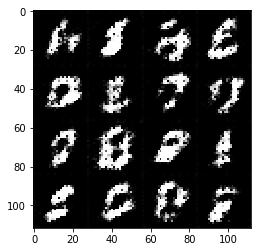

Epoch 1/2... Batch 110... Discriminator Loss: 1.4954... Generator Loss: 0.6705
Epoch 1/2... Batch 120... Discriminator Loss: 1.4191... Generator Loss: 0.4796
Epoch 1/2... Batch 130... Discriminator Loss: 1.5398... Generator Loss: 0.6146
Epoch 1/2... Batch 140... Discriminator Loss: 1.4572... Generator Loss: 0.6130
Epoch 1/2... Batch 150... Discriminator Loss: 1.6081... Generator Loss: 0.3497
Epoch 1/2... Batch 160... Discriminator Loss: 1.4937... Generator Loss: 0.5540
Epoch 1/2... Batch 170... Discriminator Loss: 1.2805... Generator Loss: 0.7026
Epoch 1/2... Batch 180... Discriminator Loss: 1.5200... Generator Loss: 0.4222
Epoch 1/2... Batch 190... Discriminator Loss: 1.2876... Generator Loss: 0.7360
Epoch 1/2... Batch 200... Discriminator Loss: 1.2213... Generator Loss: 0.6996


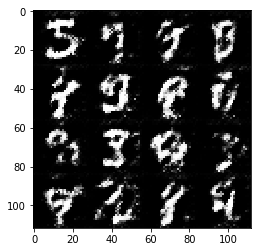

Epoch 1/2... Batch 210... Discriminator Loss: 1.2724... Generator Loss: 0.5435
Epoch 1/2... Batch 220... Discriminator Loss: 1.1150... Generator Loss: 0.7821
Epoch 1/2... Batch 230... Discriminator Loss: 1.1451... Generator Loss: 0.8062
Epoch 1/2... Batch 240... Discriminator Loss: 1.1940... Generator Loss: 0.6107
Epoch 1/2... Batch 250... Discriminator Loss: 1.4466... Generator Loss: 0.3685
Epoch 1/2... Batch 260... Discriminator Loss: 1.2132... Generator Loss: 0.6265
Epoch 1/2... Batch 270... Discriminator Loss: 1.2804... Generator Loss: 2.0229
Epoch 1/2... Batch 280... Discriminator Loss: 1.1302... Generator Loss: 0.7840
Epoch 1/2... Batch 290... Discriminator Loss: 1.1110... Generator Loss: 0.6690
Epoch 1/2... Batch 300... Discriminator Loss: 1.1243... Generator Loss: 0.6928


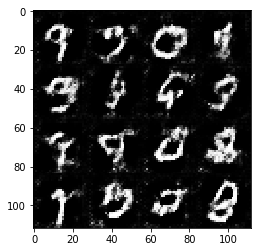

Epoch 1/2... Batch 310... Discriminator Loss: 1.1888... Generator Loss: 0.6438
Epoch 1/2... Batch 320... Discriminator Loss: 1.1309... Generator Loss: 0.6911
Epoch 1/2... Batch 330... Discriminator Loss: 1.2838... Generator Loss: 0.5198
Epoch 1/2... Batch 340... Discriminator Loss: 1.2192... Generator Loss: 0.5713
Epoch 1/2... Batch 350... Discriminator Loss: 1.4000... Generator Loss: 0.4625
Epoch 1/2... Batch 360... Discriminator Loss: 1.2386... Generator Loss: 1.1176
Epoch 1/2... Batch 370... Discriminator Loss: 1.1708... Generator Loss: 0.5960
Epoch 1/2... Batch 380... Discriminator Loss: 1.3797... Generator Loss: 0.4727
Epoch 1/2... Batch 390... Discriminator Loss: 1.2636... Generator Loss: 0.6396
Epoch 1/2... Batch 400... Discriminator Loss: 1.1990... Generator Loss: 0.8283


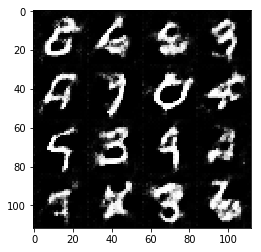

Epoch 1/2... Batch 410... Discriminator Loss: 1.3426... Generator Loss: 1.1994
Epoch 1/2... Batch 420... Discriminator Loss: 1.4882... Generator Loss: 0.3743
Epoch 1/2... Batch 430... Discriminator Loss: 1.2234... Generator Loss: 0.9823
Epoch 1/2... Batch 440... Discriminator Loss: 1.2899... Generator Loss: 0.5820
Epoch 1/2... Batch 450... Discriminator Loss: 1.2736... Generator Loss: 1.0611
Epoch 1/2... Batch 460... Discriminator Loss: 1.4425... Generator Loss: 0.4066
Epoch 2/2... Batch 10... Discriminator Loss: 1.3263... Generator Loss: 0.6082
Epoch 2/2... Batch 20... Discriminator Loss: 1.2012... Generator Loss: 0.7306
Epoch 2/2... Batch 30... Discriminator Loss: 1.1824... Generator Loss: 0.8346
Epoch 2/2... Batch 40... Discriminator Loss: 1.2195... Generator Loss: 0.6523
Epoch 2/2... Batch 50... Discriminator Loss: 1.3767... Generator Loss: 0.9406
Epoch 2/2... Batch 60... Discriminator Loss: 1.1864... Generator Loss: 0.8520
Epoch 2/2... Batch 70... Discriminator Loss: 1.2669... Gen

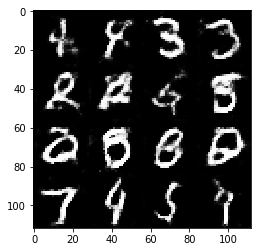

Epoch 2/2... Batch 110... Discriminator Loss: 1.1452... Generator Loss: 0.7730
Epoch 2/2... Batch 120... Discriminator Loss: 1.1860... Generator Loss: 1.0644
Epoch 2/2... Batch 130... Discriminator Loss: 1.1656... Generator Loss: 0.8032
Epoch 2/2... Batch 140... Discriminator Loss: 1.2060... Generator Loss: 0.8292
Epoch 2/2... Batch 150... Discriminator Loss: 1.4145... Generator Loss: 0.4039
Epoch 2/2... Batch 160... Discriminator Loss: 1.1825... Generator Loss: 0.8544
Epoch 2/2... Batch 170... Discriminator Loss: 1.2911... Generator Loss: 1.2554
Epoch 2/2... Batch 180... Discriminator Loss: 1.2436... Generator Loss: 0.7699
Epoch 2/2... Batch 190... Discriminator Loss: 1.2279... Generator Loss: 1.1741
Epoch 2/2... Batch 200... Discriminator Loss: 1.4031... Generator Loss: 0.4330


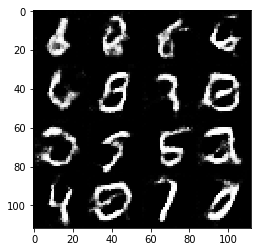

Epoch 2/2... Batch 210... Discriminator Loss: 1.2023... Generator Loss: 0.7213
Epoch 2/2... Batch 220... Discriminator Loss: 1.1342... Generator Loss: 0.7301
Epoch 2/2... Batch 230... Discriminator Loss: 1.2466... Generator Loss: 0.6749
Epoch 2/2... Batch 240... Discriminator Loss: 1.1458... Generator Loss: 0.7443
Epoch 2/2... Batch 250... Discriminator Loss: 1.2723... Generator Loss: 0.5384
Epoch 2/2... Batch 260... Discriminator Loss: 1.2439... Generator Loss: 1.1393
Epoch 2/2... Batch 270... Discriminator Loss: 1.1243... Generator Loss: 1.4637
Epoch 2/2... Batch 280... Discriminator Loss: 1.2845... Generator Loss: 1.1999
Epoch 2/2... Batch 290... Discriminator Loss: 1.1681... Generator Loss: 0.7286
Epoch 2/2... Batch 300... Discriminator Loss: 1.3264... Generator Loss: 0.4988


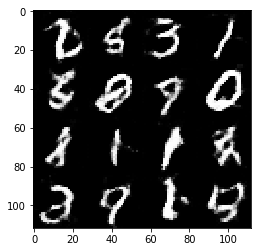

Epoch 2/2... Batch 310... Discriminator Loss: 1.2099... Generator Loss: 0.5268
Epoch 2/2... Batch 320... Discriminator Loss: 1.1643... Generator Loss: 0.6236
Epoch 2/2... Batch 330... Discriminator Loss: 1.3145... Generator Loss: 1.2432
Epoch 2/2... Batch 340... Discriminator Loss: 1.1274... Generator Loss: 0.6342
Epoch 2/2... Batch 350... Discriminator Loss: 1.2672... Generator Loss: 1.2615
Epoch 2/2... Batch 360... Discriminator Loss: 1.2032... Generator Loss: 0.7034
Epoch 2/2... Batch 370... Discriminator Loss: 1.1686... Generator Loss: 0.5946
Epoch 2/2... Batch 380... Discriminator Loss: 1.2539... Generator Loss: 0.6323
Epoch 2/2... Batch 390... Discriminator Loss: 1.2347... Generator Loss: 1.2022
Epoch 2/2... Batch 400... Discriminator Loss: 1.1610... Generator Loss: 0.6400


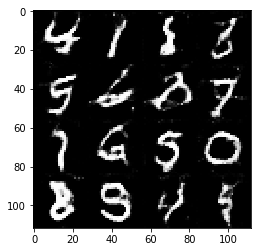

Epoch 2/2... Batch 410... Discriminator Loss: 1.1239... Generator Loss: 0.6983
Epoch 2/2... Batch 420... Discriminator Loss: 1.2454... Generator Loss: 1.0151
Epoch 2/2... Batch 430... Discriminator Loss: 1.5235... Generator Loss: 0.3289
Epoch 2/2... Batch 440... Discriminator Loss: 1.1650... Generator Loss: 0.7212
Epoch 2/2... Batch 450... Discriminator Loss: 1.1810... Generator Loss: 0.6623
Epoch 2/2... Batch 460... Discriminator Loss: 1.1291... Generator Loss: 0.6362


In [29]:
batch_size = 128
z_dim = 125
learning_rate = 0.0002
beta1 = 0.5

losses_mnist = []

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    losses_mnist = train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

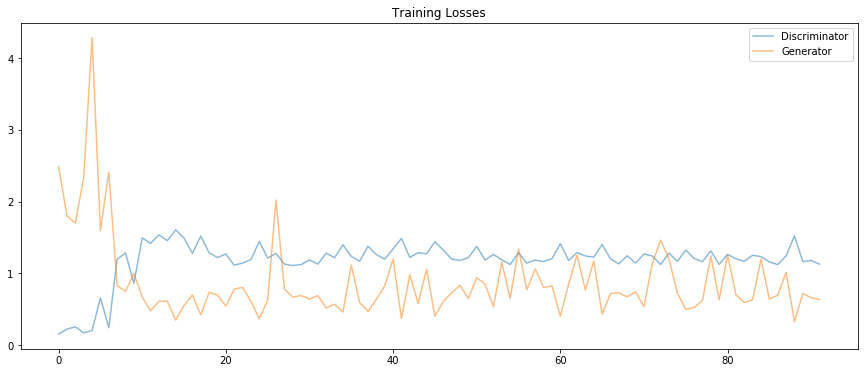

In [30]:
import matplotlib.pyplot as plt

losses = np.array(losses_mnist)
plt.figure(figsize=(15,6))
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
_ = plt.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 2.9181... Generator Loss: 0.0941
Epoch 1/1... Batch 20... Discriminator Loss: 1.9769... Generator Loss: 0.2569
Epoch 1/1... Batch 30... Discriminator Loss: 1.6664... Generator Loss: 0.3813
Epoch 1/1... Batch 40... Discriminator Loss: 1.0920... Generator Loss: 0.6472
Epoch 1/1... Batch 50... Discriminator Loss: 1.7053... Generator Loss: 0.3904
Epoch 1/1... Batch 60... Discriminator Loss: 1.4434... Generator Loss: 0.4945
Epoch 1/1... Batch 70... Discriminator Loss: 1.3745... Generator Loss: 0.6476
Epoch 1/1... Batch 80... Discriminator Loss: 0.9816... Generator Loss: 1.1181
Epoch 1/1... Batch 90... Discriminator Loss: 1.3506... Generator Loss: 0.8300
Epoch 1/1... Batch 100... Discriminator Loss: 0.8523... Generator Loss: 1.1238


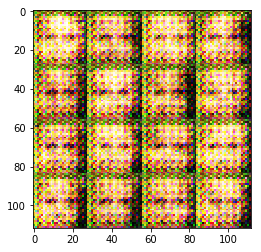

Epoch 1/1... Batch 110... Discriminator Loss: 1.5078... Generator Loss: 0.6176
Epoch 1/1... Batch 120... Discriminator Loss: 1.2252... Generator Loss: 0.7788
Epoch 1/1... Batch 130... Discriminator Loss: 1.6789... Generator Loss: 0.6874
Epoch 1/1... Batch 140... Discriminator Loss: 1.1442... Generator Loss: 0.7945
Epoch 1/1... Batch 150... Discriminator Loss: 1.3013... Generator Loss: 0.7054
Epoch 1/1... Batch 160... Discriminator Loss: 1.5292... Generator Loss: 0.6444
Epoch 1/1... Batch 170... Discriminator Loss: 1.2580... Generator Loss: 0.8345
Epoch 1/1... Batch 180... Discriminator Loss: 1.2105... Generator Loss: 0.8506
Epoch 1/1... Batch 190... Discriminator Loss: 1.5458... Generator Loss: 0.6333
Epoch 1/1... Batch 200... Discriminator Loss: 1.1616... Generator Loss: 1.0260


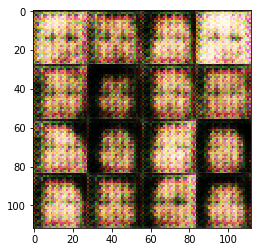

Epoch 1/1... Batch 210... Discriminator Loss: 1.2841... Generator Loss: 0.6561
Epoch 1/1... Batch 220... Discriminator Loss: 1.4059... Generator Loss: 0.7497
Epoch 1/1... Batch 230... Discriminator Loss: 1.6014... Generator Loss: 0.5663
Epoch 1/1... Batch 240... Discriminator Loss: 1.0736... Generator Loss: 1.0875
Epoch 1/1... Batch 250... Discriminator Loss: 1.6302... Generator Loss: 0.4089
Epoch 1/1... Batch 260... Discriminator Loss: 1.2153... Generator Loss: 0.7357
Epoch 1/1... Batch 270... Discriminator Loss: 1.3989... Generator Loss: 0.9815
Epoch 1/1... Batch 280... Discriminator Loss: 1.1772... Generator Loss: 0.7437
Epoch 1/1... Batch 290... Discriminator Loss: 1.3484... Generator Loss: 0.6753
Epoch 1/1... Batch 300... Discriminator Loss: 0.8612... Generator Loss: 1.0952


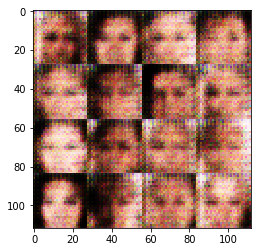

Epoch 1/1... Batch 310... Discriminator Loss: 0.8934... Generator Loss: 1.0147
Epoch 1/1... Batch 320... Discriminator Loss: 0.7866... Generator Loss: 1.3909
Epoch 1/1... Batch 330... Discriminator Loss: 0.7531... Generator Loss: 1.2733
Epoch 1/1... Batch 340... Discriminator Loss: 1.3323... Generator Loss: 0.6888
Epoch 1/1... Batch 350... Discriminator Loss: 0.8098... Generator Loss: 1.2351
Epoch 1/1... Batch 360... Discriminator Loss: 1.1921... Generator Loss: 0.6170
Epoch 1/1... Batch 370... Discriminator Loss: 0.8923... Generator Loss: 1.1087
Epoch 1/1... Batch 380... Discriminator Loss: 0.5390... Generator Loss: 2.1649
Epoch 1/1... Batch 390... Discriminator Loss: 0.9587... Generator Loss: 0.7356
Epoch 1/1... Batch 400... Discriminator Loss: 0.5109... Generator Loss: 2.6914


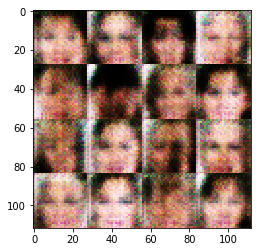

Epoch 1/1... Batch 410... Discriminator Loss: 0.7861... Generator Loss: 0.9346
Epoch 1/1... Batch 420... Discriminator Loss: 0.7282... Generator Loss: 3.1622
Epoch 1/1... Batch 430... Discriminator Loss: 1.3103... Generator Loss: 0.5024
Epoch 1/1... Batch 440... Discriminator Loss: 0.7777... Generator Loss: 2.4858
Epoch 1/1... Batch 450... Discriminator Loss: 1.2898... Generator Loss: 0.5745
Epoch 1/1... Batch 460... Discriminator Loss: 1.3537... Generator Loss: 0.6843
Epoch 1/1... Batch 470... Discriminator Loss: 0.5637... Generator Loss: 2.4745
Epoch 1/1... Batch 480... Discriminator Loss: 0.8259... Generator Loss: 1.0153
Epoch 1/1... Batch 490... Discriminator Loss: 0.4340... Generator Loss: 2.1949
Epoch 1/1... Batch 500... Discriminator Loss: 0.4638... Generator Loss: 2.1526


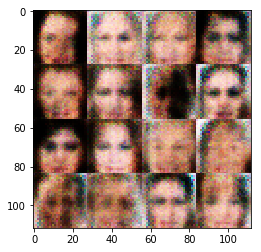

Epoch 1/1... Batch 510... Discriminator Loss: 0.8079... Generator Loss: 0.8546
Epoch 1/1... Batch 520... Discriminator Loss: 0.3551... Generator Loss: 2.3296
Epoch 1/1... Batch 530... Discriminator Loss: 1.8828... Generator Loss: 0.2483
Epoch 1/1... Batch 540... Discriminator Loss: 0.9053... Generator Loss: 0.8426
Epoch 1/1... Batch 550... Discriminator Loss: 0.5423... Generator Loss: 2.1551
Epoch 1/1... Batch 560... Discriminator Loss: 0.2775... Generator Loss: 2.3749
Epoch 1/1... Batch 570... Discriminator Loss: 0.6887... Generator Loss: 1.3604
Epoch 1/1... Batch 580... Discriminator Loss: 0.4075... Generator Loss: 2.0275
Epoch 1/1... Batch 590... Discriminator Loss: 0.8023... Generator Loss: 1.0498
Epoch 1/1... Batch 600... Discriminator Loss: 1.0684... Generator Loss: 0.5922


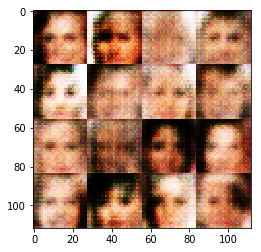

Epoch 1/1... Batch 610... Discriminator Loss: 1.3443... Generator Loss: 0.7841
Epoch 1/1... Batch 620... Discriminator Loss: 0.6226... Generator Loss: 3.2157
Epoch 1/1... Batch 630... Discriminator Loss: 1.5024... Generator Loss: 0.4666
Epoch 1/1... Batch 640... Discriminator Loss: 0.8002... Generator Loss: 2.9785
Epoch 1/1... Batch 650... Discriminator Loss: 0.2551... Generator Loss: 4.2617
Epoch 1/1... Batch 660... Discriminator Loss: 0.6669... Generator Loss: 1.1856
Epoch 1/1... Batch 670... Discriminator Loss: 1.3989... Generator Loss: 0.5964
Epoch 1/1... Batch 680... Discriminator Loss: 2.4784... Generator Loss: 0.1245
Epoch 1/1... Batch 690... Discriminator Loss: 1.5456... Generator Loss: 0.7846
Epoch 1/1... Batch 700... Discriminator Loss: 1.4830... Generator Loss: 0.5381


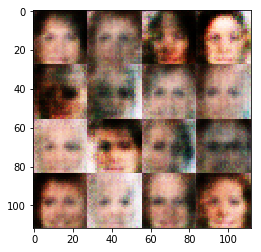

Epoch 1/1... Batch 710... Discriminator Loss: 1.5540... Generator Loss: 0.5355
Epoch 1/1... Batch 720... Discriminator Loss: 1.3918... Generator Loss: 0.6717
Epoch 1/1... Batch 730... Discriminator Loss: 1.5213... Generator Loss: 0.6344
Epoch 1/1... Batch 740... Discriminator Loss: 1.6478... Generator Loss: 0.5627
Epoch 1/1... Batch 750... Discriminator Loss: 1.5198... Generator Loss: 0.6376
Epoch 1/1... Batch 760... Discriminator Loss: 1.5572... Generator Loss: 0.5741
Epoch 1/1... Batch 770... Discriminator Loss: 1.4273... Generator Loss: 0.6543
Epoch 1/1... Batch 780... Discriminator Loss: 1.4941... Generator Loss: 0.6358
Epoch 1/1... Batch 790... Discriminator Loss: 1.4889... Generator Loss: 0.6484
Epoch 1/1... Batch 800... Discriminator Loss: 1.4657... Generator Loss: 0.6618


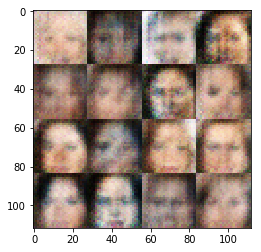

Epoch 1/1... Batch 810... Discriminator Loss: 1.4815... Generator Loss: 0.6070
Epoch 1/1... Batch 820... Discriminator Loss: 1.4662... Generator Loss: 0.6552
Epoch 1/1... Batch 830... Discriminator Loss: 1.4109... Generator Loss: 0.6801
Epoch 1/1... Batch 840... Discriminator Loss: 1.4208... Generator Loss: 0.6699
Epoch 1/1... Batch 850... Discriminator Loss: 1.4709... Generator Loss: 0.6123
Epoch 1/1... Batch 860... Discriminator Loss: 1.4118... Generator Loss: 0.6661
Epoch 1/1... Batch 870... Discriminator Loss: 1.4646... Generator Loss: 0.6743
Epoch 1/1... Batch 880... Discriminator Loss: 1.4639... Generator Loss: 0.6438
Epoch 1/1... Batch 890... Discriminator Loss: 1.4359... Generator Loss: 0.6475
Epoch 1/1... Batch 900... Discriminator Loss: 1.3830... Generator Loss: 0.6734


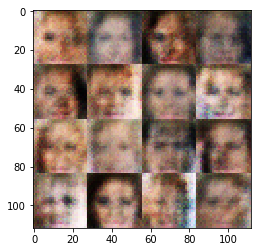

Epoch 1/1... Batch 910... Discriminator Loss: 1.4587... Generator Loss: 0.6394
Epoch 1/1... Batch 920... Discriminator Loss: 1.3711... Generator Loss: 0.6885
Epoch 1/1... Batch 930... Discriminator Loss: 1.4428... Generator Loss: 0.6604
Epoch 1/1... Batch 940... Discriminator Loss: 1.4824... Generator Loss: 0.6363
Epoch 1/1... Batch 950... Discriminator Loss: 1.2965... Generator Loss: 0.7079
Epoch 1/1... Batch 960... Discriminator Loss: 1.4854... Generator Loss: 0.6359
Epoch 1/1... Batch 970... Discriminator Loss: 1.3149... Generator Loss: 0.6956
Epoch 1/1... Batch 980... Discriminator Loss: 1.3632... Generator Loss: 0.6850
Epoch 1/1... Batch 990... Discriminator Loss: 1.3845... Generator Loss: 0.6999
Epoch 1/1... Batch 1000... Discriminator Loss: 1.4170... Generator Loss: 0.6820


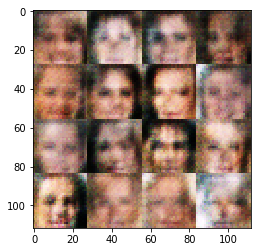

Epoch 1/1... Batch 1010... Discriminator Loss: 1.4362... Generator Loss: 0.6766
Epoch 1/1... Batch 1020... Discriminator Loss: 1.3570... Generator Loss: 0.7248
Epoch 1/1... Batch 1030... Discriminator Loss: 1.4500... Generator Loss: 0.6660
Epoch 1/1... Batch 1040... Discriminator Loss: 1.3623... Generator Loss: 0.7068
Epoch 1/1... Batch 1050... Discriminator Loss: 1.4959... Generator Loss: 0.6330
Epoch 1/1... Batch 1060... Discriminator Loss: 1.3899... Generator Loss: 0.6765
Epoch 1/1... Batch 1070... Discriminator Loss: 1.3932... Generator Loss: 0.6593
Epoch 1/1... Batch 1080... Discriminator Loss: 1.3828... Generator Loss: 0.6771
Epoch 1/1... Batch 1090... Discriminator Loss: 1.3652... Generator Loss: 0.7085
Epoch 1/1... Batch 1100... Discriminator Loss: 1.4559... Generator Loss: 0.6587


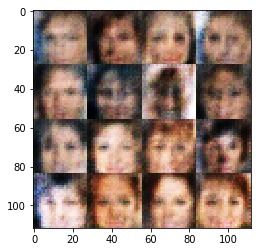

Epoch 1/1... Batch 1110... Discriminator Loss: 1.4113... Generator Loss: 0.6886
Epoch 1/1... Batch 1120... Discriminator Loss: 1.3610... Generator Loss: 0.6997
Epoch 1/1... Batch 1130... Discriminator Loss: 1.4919... Generator Loss: 0.6384
Epoch 1/1... Batch 1140... Discriminator Loss: 1.4379... Generator Loss: 0.6638
Epoch 1/1... Batch 1150... Discriminator Loss: 1.3307... Generator Loss: 0.7009
Epoch 1/1... Batch 1160... Discriminator Loss: 1.3668... Generator Loss: 0.6938
Epoch 1/1... Batch 1170... Discriminator Loss: 1.3730... Generator Loss: 0.6971
Epoch 1/1... Batch 1180... Discriminator Loss: 1.3936... Generator Loss: 0.6828
Epoch 1/1... Batch 1190... Discriminator Loss: 1.3255... Generator Loss: 0.6941
Epoch 1/1... Batch 1200... Discriminator Loss: 1.3984... Generator Loss: 0.6853


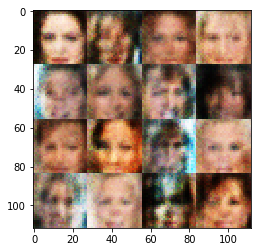

Epoch 1/1... Batch 1210... Discriminator Loss: 1.4280... Generator Loss: 0.6470
Epoch 1/1... Batch 1220... Discriminator Loss: 1.3856... Generator Loss: 0.7444
Epoch 1/1... Batch 1230... Discriminator Loss: 1.3903... Generator Loss: 0.6822
Epoch 1/1... Batch 1240... Discriminator Loss: 1.3497... Generator Loss: 0.6775
Epoch 1/1... Batch 1250... Discriminator Loss: 1.3548... Generator Loss: 0.6987
Epoch 1/1... Batch 1260... Discriminator Loss: 1.4981... Generator Loss: 0.6381
Epoch 1/1... Batch 1270... Discriminator Loss: 1.4102... Generator Loss: 0.6521
Epoch 1/1... Batch 1280... Discriminator Loss: 1.3811... Generator Loss: 0.6715
Epoch 1/1... Batch 1290... Discriminator Loss: 1.4016... Generator Loss: 0.7082
Epoch 1/1... Batch 1300... Discriminator Loss: 1.4718... Generator Loss: 0.6394


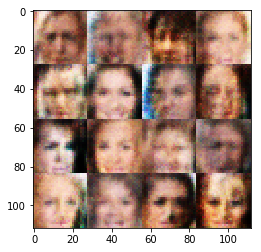

Epoch 1/1... Batch 1310... Discriminator Loss: 1.4254... Generator Loss: 0.6504
Epoch 1/1... Batch 1320... Discriminator Loss: 1.4398... Generator Loss: 0.6620
Epoch 1/1... Batch 1330... Discriminator Loss: 1.3898... Generator Loss: 0.6772
Epoch 1/1... Batch 1340... Discriminator Loss: 1.4600... Generator Loss: 0.6584
Epoch 1/1... Batch 1350... Discriminator Loss: 1.4021... Generator Loss: 0.6415
Epoch 1/1... Batch 1360... Discriminator Loss: 1.4497... Generator Loss: 0.6576
Epoch 1/1... Batch 1370... Discriminator Loss: 1.4293... Generator Loss: 0.6510
Epoch 1/1... Batch 1380... Discriminator Loss: 1.3957... Generator Loss: 0.6754
Epoch 1/1... Batch 1390... Discriminator Loss: 1.3479... Generator Loss: 0.6989
Epoch 1/1... Batch 1400... Discriminator Loss: 1.4545... Generator Loss: 0.6148


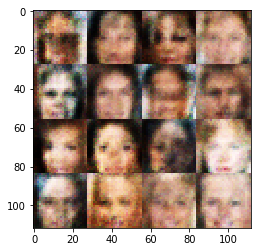

Epoch 1/1... Batch 1410... Discriminator Loss: 1.4971... Generator Loss: 0.6281
Epoch 1/1... Batch 1420... Discriminator Loss: 1.3852... Generator Loss: 0.6695
Epoch 1/1... Batch 1430... Discriminator Loss: 1.4331... Generator Loss: 0.6695
Epoch 1/1... Batch 1440... Discriminator Loss: 1.5223... Generator Loss: 0.6170
Epoch 1/1... Batch 1450... Discriminator Loss: 1.3243... Generator Loss: 0.7043
Epoch 1/1... Batch 1460... Discriminator Loss: 1.3916... Generator Loss: 0.6541
Epoch 1/1... Batch 1470... Discriminator Loss: 1.4912... Generator Loss: 0.6439
Epoch 1/1... Batch 1480... Discriminator Loss: 1.3795... Generator Loss: 0.6600
Epoch 1/1... Batch 1490... Discriminator Loss: 1.3008... Generator Loss: 0.7435
Epoch 1/1... Batch 1500... Discriminator Loss: 1.4448... Generator Loss: 0.6671


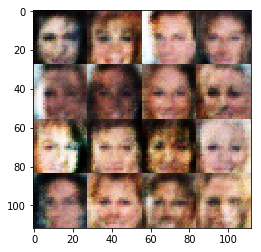

Epoch 1/1... Batch 1510... Discriminator Loss: 1.4899... Generator Loss: 0.6387
Epoch 1/1... Batch 1520... Discriminator Loss: 1.3168... Generator Loss: 0.6830
Epoch 1/1... Batch 1530... Discriminator Loss: 1.4232... Generator Loss: 0.6499
Epoch 1/1... Batch 1540... Discriminator Loss: 1.4956... Generator Loss: 0.6402
Epoch 1/1... Batch 1550... Discriminator Loss: 1.4240... Generator Loss: 0.6557
Epoch 1/1... Batch 1560... Discriminator Loss: 1.3357... Generator Loss: 0.7189
Epoch 1/1... Batch 1570... Discriminator Loss: 1.4111... Generator Loss: 0.6525
Epoch 1/1... Batch 1580... Discriminator Loss: 1.4014... Generator Loss: 0.6605


In [15]:
batch_size = 128
z_dim = 125
learning_rate = 0.0001
beta1 = 0.5

losses_celebA = []

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    losses_celebA = train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

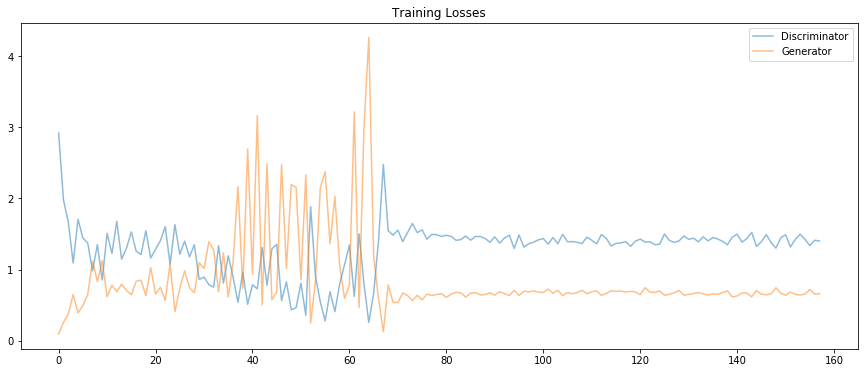

In [31]:
losses = np.array(losses_celebA)
plt.figure(figsize=(15,6))
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
_ = plt.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.